<a href="https://colab.research.google.com/github/FrancoFM93/TelecomX_1_challenge/blob/main/telecomx_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X — Customer Churn Analysis (EDA)

##Librerías y configuración

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

##Carga de datos

In [50]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)
print("Filas y columnas:", df.shape)
df.head()

Filas y columnas: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##Flatten columnas anidadas

In [51]:
nested_cols = ['customer', 'phone', 'internet', 'account']
for col in nested_cols:
    temp_df = pd.json_normalize(df[col])
    temp_df.columns = [f"{col}_{c}" for c in temp_df.columns]
    df = df.drop(columns=[col])
    df = pd.concat([df, temp_df], axis=1)
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Verificación de nulos y duplicados

In [52]:
print("Nulos por columna:")
display(df.isna().sum())
print("Duplicados:", df.duplicated().sum())

Nulos por columna:


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


Duplicados: 0


##Preparar columna Churn

In [53]:
print(df.columns.tolist())

# Buscar columnas que contengan 'churn' (case-insensitive)
print([c for c in df.columns if "churn" in c.lower()])


['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']
['Churn']


In [54]:
CHURN_COL = "Churn"

# Normalizar valores y convertir a string
df[CHURN_COL] = df[CHURN_COL].astype(str).str.strip().str.lower()

# Reemplazar valores tipo 'nan', 'none', vacíos, etc. por np.nan
df[CHURN_COL] = df[CHURN_COL].replace(["nan", "none", ""], np.nan)

# Mapear Yes/No a 1/0 (si existen)
df[CHURN_COL] = df[CHURN_COL].map({"yes": 1, "no": 0})

# Verificar resultado
print("Valores únicos en Churn después del mapeo:", df[CHURN_COL].unique())
print("Cantidad de NaN en Churn:", df[CHURN_COL].isna().sum())


Valores únicos en Churn después del mapeo: [ 0.  1. nan]
Cantidad de NaN en Churn: 224


##Columnas numéricas y Cuentas_Diarias

In [56]:
num_cols = ['account_monthlycharges', 'account_totalcharges', 'account_tenure']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

if 'account_monthlycharges' in df.columns:
    df['Cuentas_Diarias'] = df['account_monthlycharges'] / 30

##Estandarización de texto

In [57]:
def normalize_text(s):
    return str(s).strip().lower().replace("sí","si").replace(" ","_")

for c in df.select_dtypes(include='object').columns:
    if df[c].nunique() <= 50:
        df[c] = df[c].apply(normalize_text)

##Análisis descriptivo

In [58]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7043.0,NaN,NaN,NaN,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
customer_gender,7267,2,male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_SeniorCitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
customer_Partner,7267,2,no,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_Dependents,7267,2,no,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phone_PhoneService,7267,2,yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone_MultipleLines,7267,3,no,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet_InternetService,7267,3,fiber_optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Distribución de Churn

In [ ]:
# Filtrar filas donde Churn no sea NaN
df_churn = df[df[CHURN_COL].notna()]

# Distribución de Churn
sns.countplot(x=CHURN_COL, data=df_churn)
plt.title("Distribución de Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()

##Churn vs Variables Categóricas

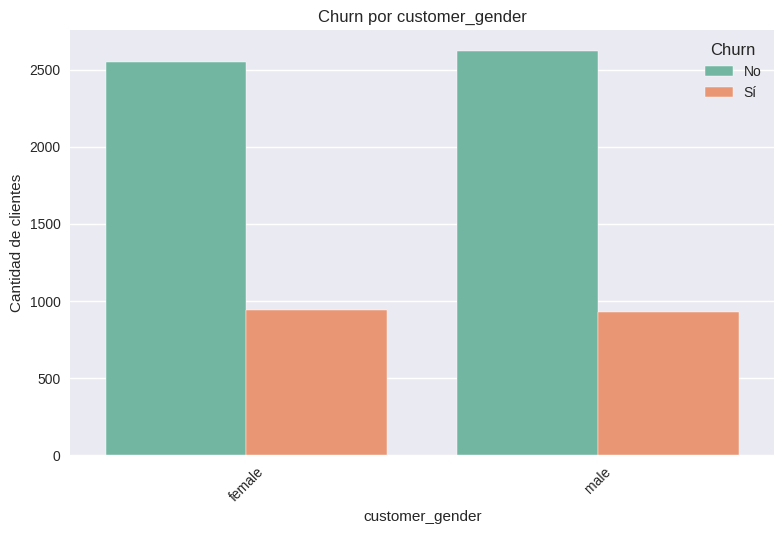

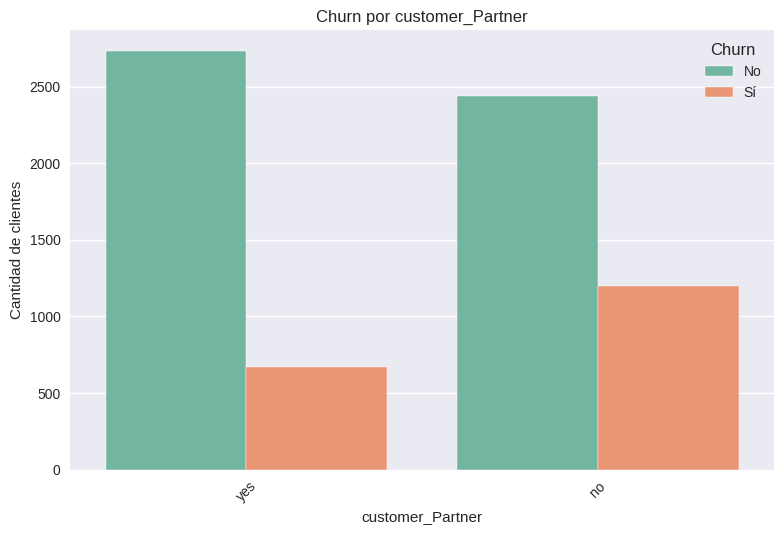

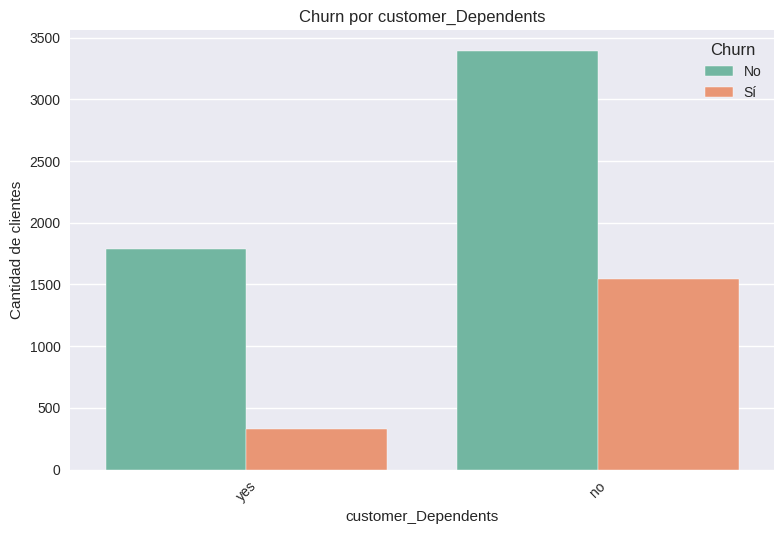

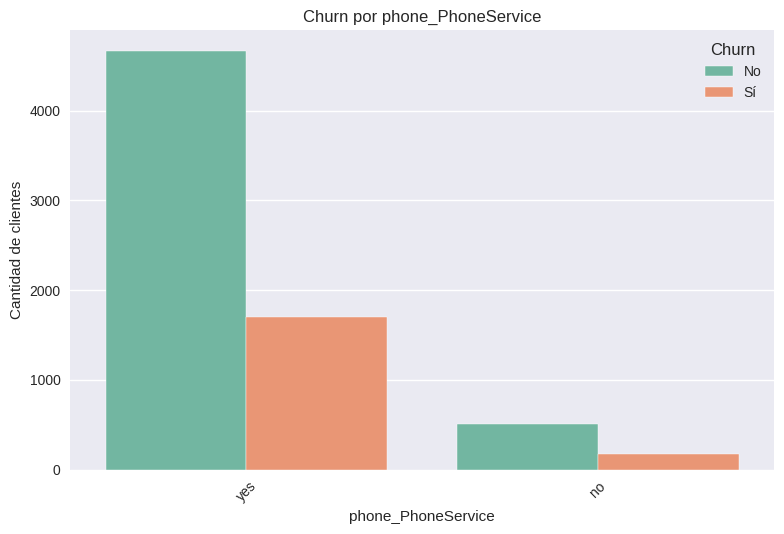

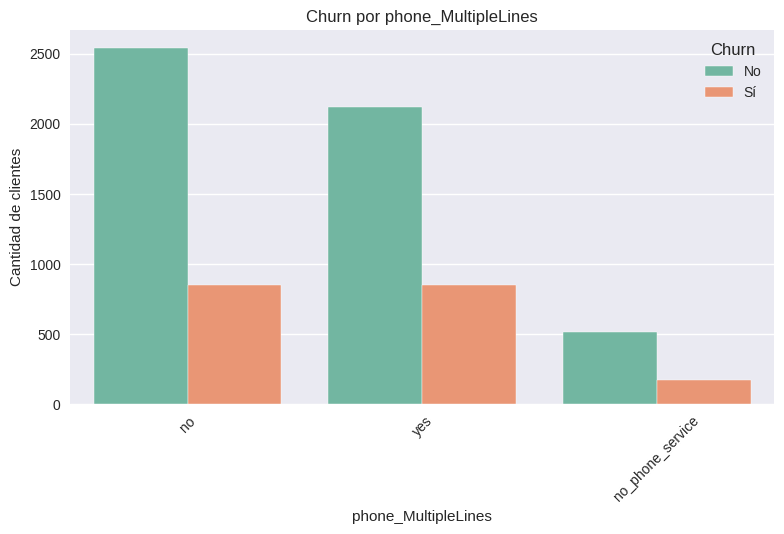

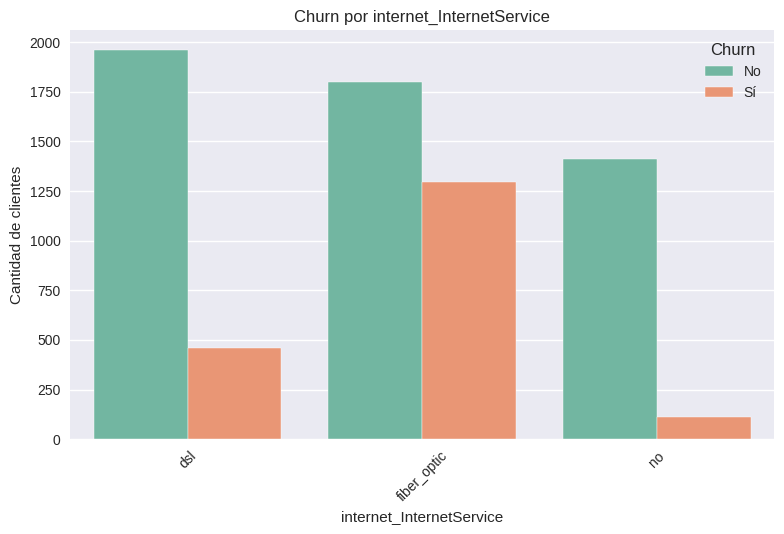

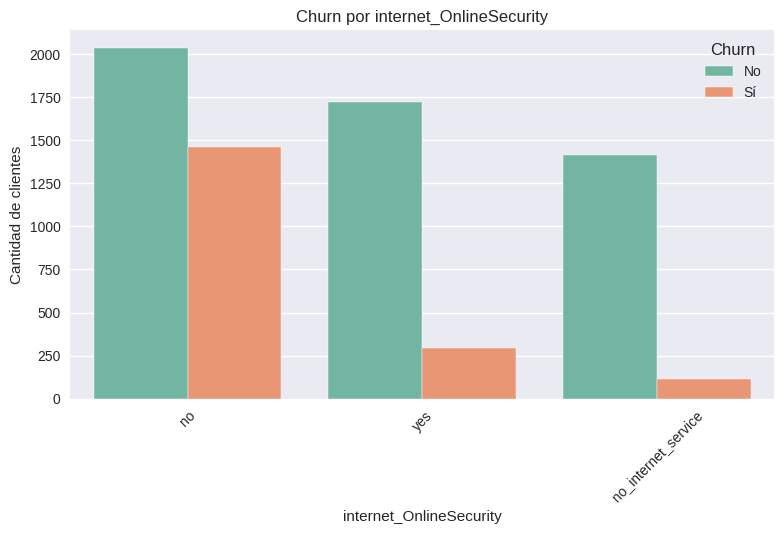

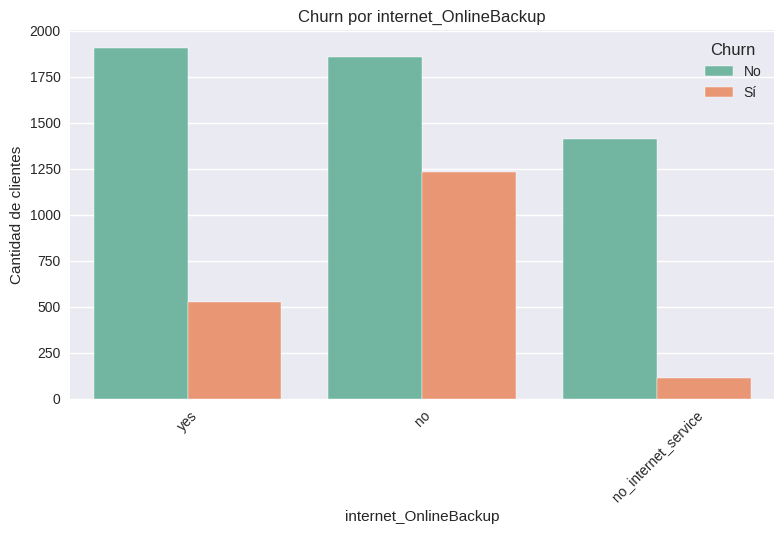

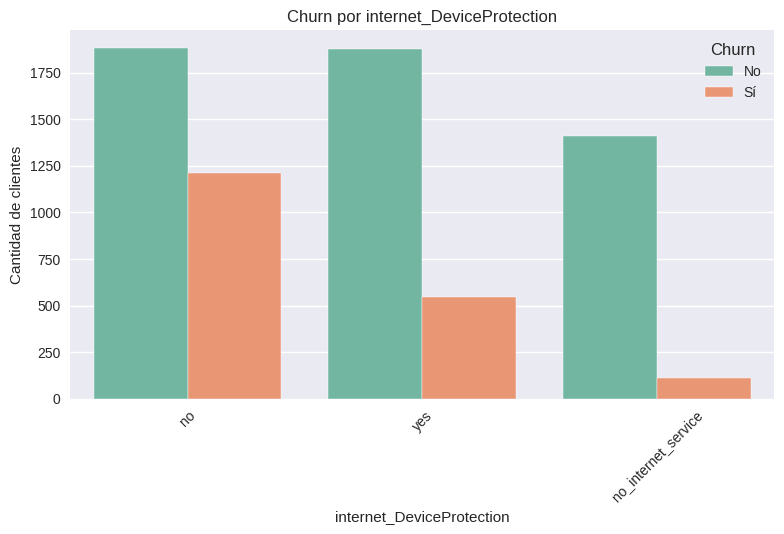

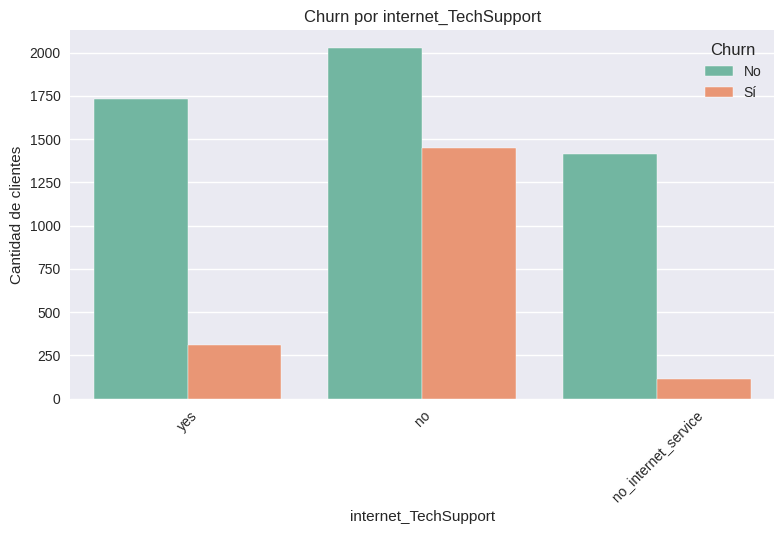

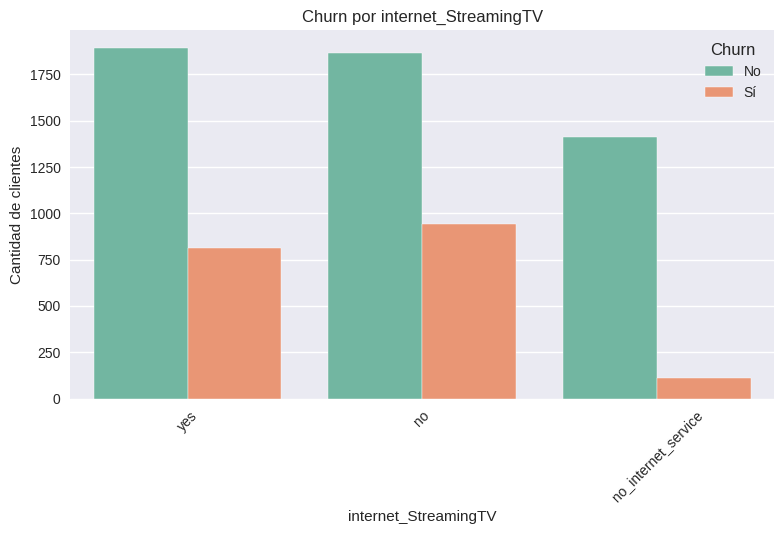

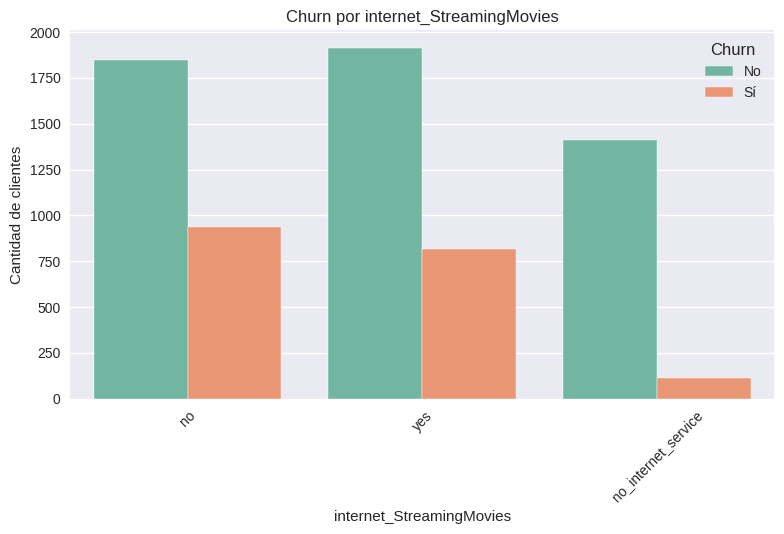

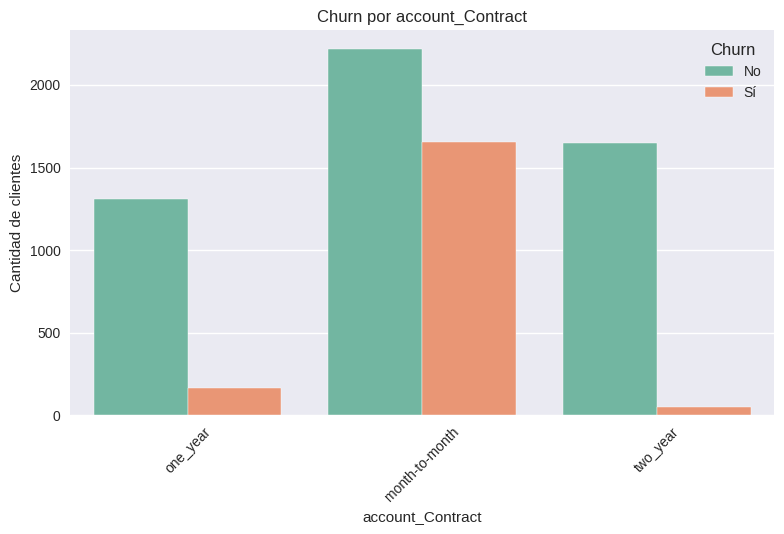

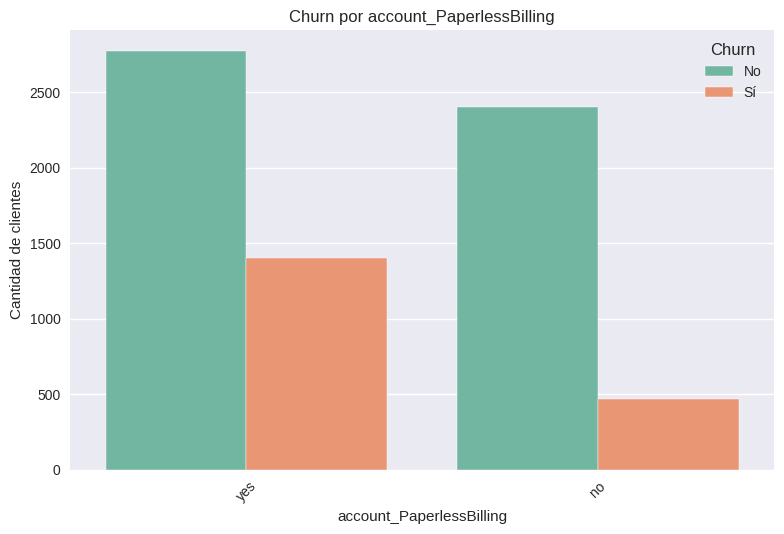

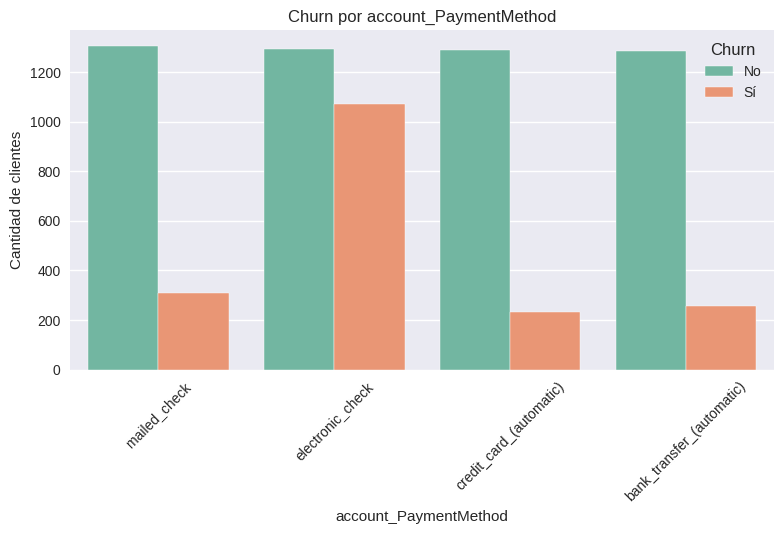

In [60]:
cat_cols = [c for c in df.select_dtypes(include='object').columns if df[c].nunique() <= 20]
for c in cat_cols:
    plt.figure()
    sns.countplot(x=c, hue=CHURN_COL, data=df)
    plt.title(f"Churn por {c}")
    plt.xlabel(c)
    plt.ylabel("Cantidad de clientes")
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

##Churn vs Variables Numéricas

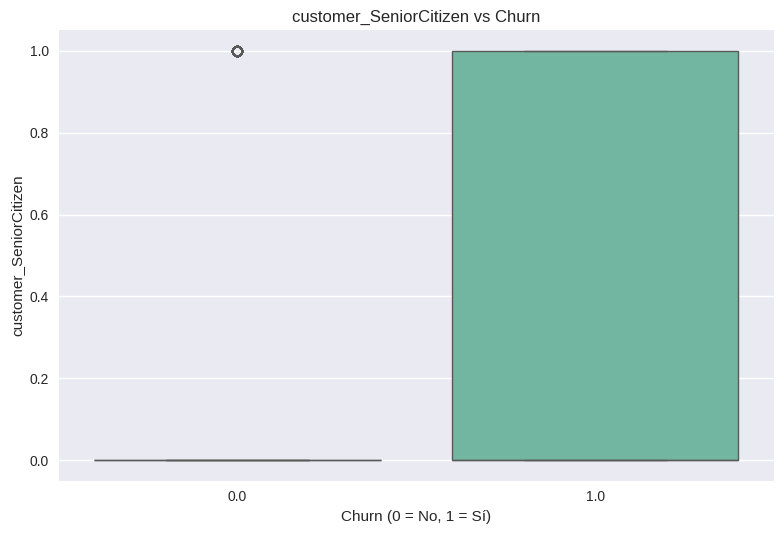

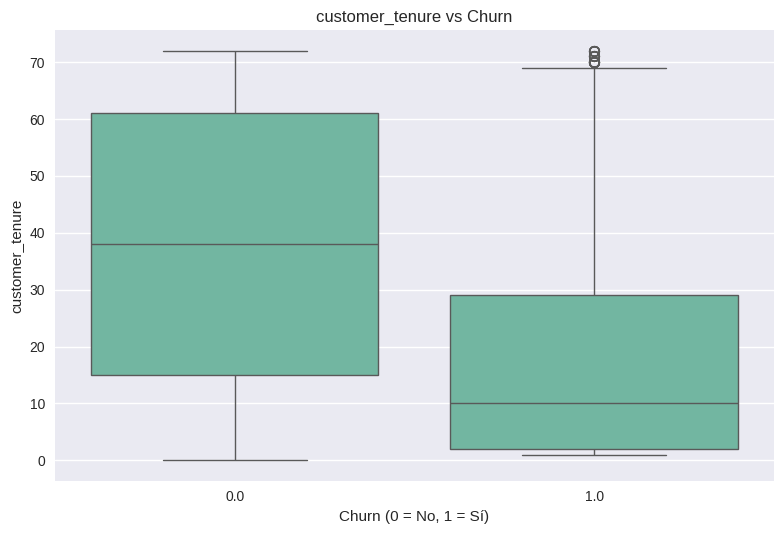

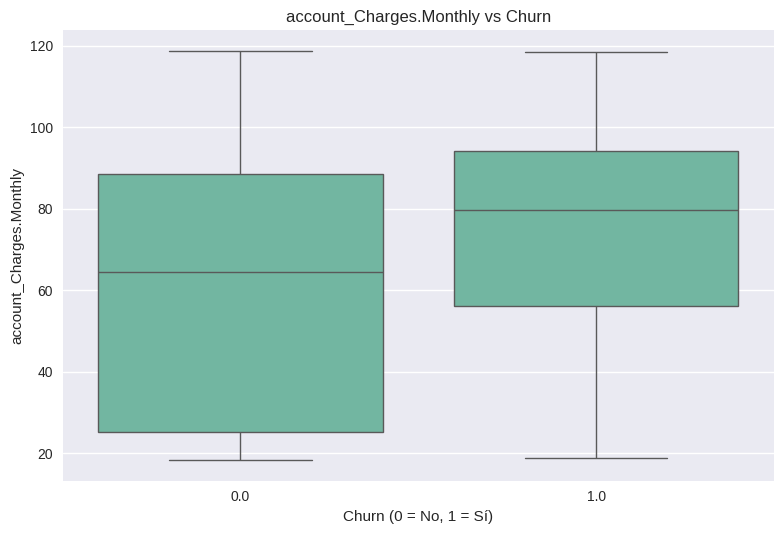

In [61]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove(CHURN_COL)
for c in num_cols:
    plt.figure()
    sns.boxplot(x=CHURN_COL, y=c, data=df)
    plt.title(f"{c} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Sí)")
    plt.ylabel(c)
    plt.tight_layout()
    plt.show()

##Correlación entre variables (numéricas y categóricas)

📊 Matriz de correlaciones (solo numéricas):


,Churn,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly
Churn,1.000000,0.150889,-0.352229,0.193356
customer_SeniorCitizen,0.150889,1.000000,0.018187,0.220388
customer_tenure,-0.352229,0.018187,1.000000,0.247982
account_Charges.Monthly,0.193356,0.220388,0.247982,1.000000


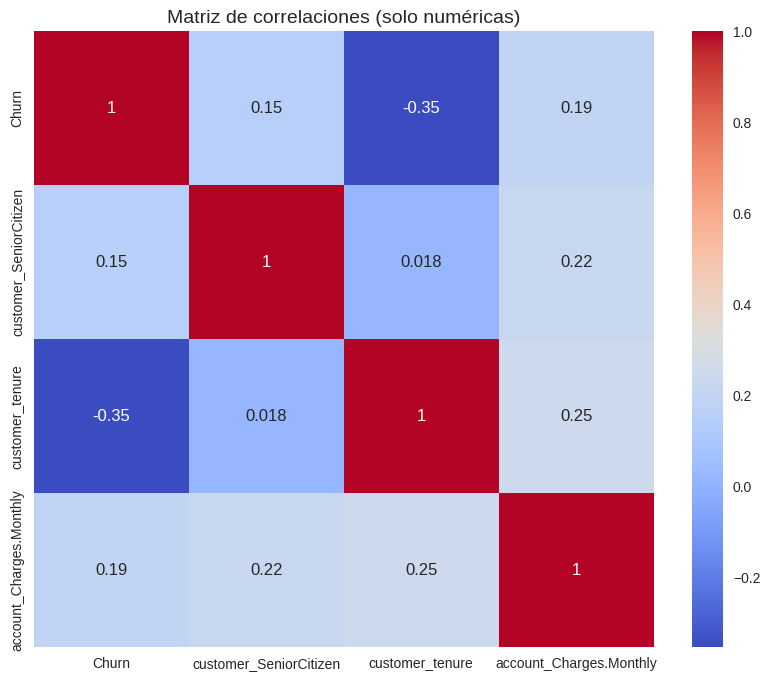

📊 Matriz de correlaciones (con variables categóricas transformadas):


In [ ]:
print("📊 Matriz de correlaciones (solo numéricas):")
corr_numeric = df.corr(numeric_only=True)
display(corr_numeric)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_numeric, annot=True, cmap="coolwarm", cbar=True)
plt.title("Matriz de correlaciones (solo numéricas)", fontsize=14)
plt.show()

# Esto permite calcular correlaciones entre todas las variables
print("📊 Matriz de correlaciones (con variables categóricas transformadas):")

# Transformamos variables categóricas a dummies (0/1)
df_encoded = pd.get_dummies(df, drop_first=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculamos la matriz de correlación sobre el nuevo DF
corr_encoded = df_encoded.corr()

# Mostramos matriz
plt.figure(figsize=(14, 10))
sns.heatmap(corr_encoded, cmap="coolwarm", cbar=True)
plt.title("Matriz de correlaciones (incluyendo categóricas codificadas)", fontsize=14)
plt.show()

##Guardar dataset limpio

In [ ]:
df.to_csv("/content/telecomx_clean.csv", index=False)